In [88]:
import pandas as pd
data = pd.read_csv('components.csv')
data.tail()

,ComponentName,Language,Functionality,preCondition,postCondition
46,HotelSearch,React,search for hotels using city and state name,NaN,NaN
47,HotelListUI,React,list of hotels with hotel select from list,NaN,NaN
48,FromDateToDate,React,from date and to date input,NaN,NaN
49,HotelRentCalculator,React,calculate rent of hotel room using number of d...,NaN,NaN
50,BookingConfirmation,React,confirmation page display,NaN,NaN


In [89]:
functionalites=data.loc[:,"Functionality"]
componentNames=data.loc[:,"ComponentName"]
# componentFileNames=data.loc[:,"File Name"]

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(functionalites)

In [91]:
print(vectorizer.get_feature_names())
print(X.shape)

['add', 'address', 'age', 'airline', 'amount', 'and', 'arrival', 'author', 'available', 'berths', 'birth', 'book', 'booking', 'box', 'button', 'calculate', 'calculator', 'captcha', 'card', 'cash', 'category', 'channel', 'check', 'city', 'class', 'code', 'confirm', 'confirmation', 'confirmed', 'cost', 'credit', 'date', 'days', 'debit', 'departure', 'details', 'discount', 'display', 'doj', 'dropdown', 'duration', 'email', 'entering', 'error', 'failed', 'fare', 'flight', 'flights', 'for', 'from', 'gender', 'genre', 'get', 'given', 'gst', 'guests', 'hotel', 'hotels', 'id', 'input', 'items', 'journey', 'like', 'list', 'login', 'logout', 'name', 'netbanking', 'night', 'number', 'of', 'on', 'option', 'options', 'or', 'page', 'passenger', 'password', 'payment', 'per', 'phone', 'picker', 'player', 'price', 'product', 'products', 'profile', 'quota', 'register', 'registration', 'rent', 'renting', 'results', 'room', 'search', 'searched', 'searching', 'select', 'selected', 'sent', 'state', 'stops',

/home/anshuman/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

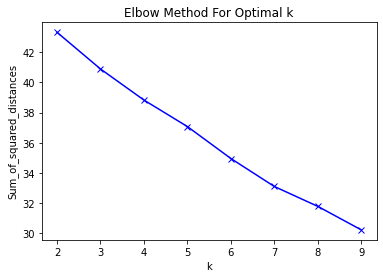

In [93]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
true_k = 7
model=KMeans(n_clusters=true_k).fit(X)
labels=model.labels_
functionality_cluster=pd.DataFrame(list(zip(componentNames,labels)),columns=['ComponentName','cluster'])
print(functionality_cluster.sort_values(by=['cluster']))

             ComponentName  cluster
31                Register        0
33               Register2        0
20            LoginScreen1        0
19             LoginScreen        0
18          LoginErrorPage        0
17      LoginCaptchaScreen        0
38            ThankYouPage        0
32               Register1        0
48          FromDateToDate        1
44           DateOfJourney        1
22           NumberOfItems        2
14               GetTrains        2
13              GetFlights        2
12       FromCityToCityDOJ        2
9   FlightBookingConfirmed        2
7        ClassTypeAndQuota        2
6        CityNameWithState        2
45         FlightClassType        2
46             HotelSearch        2
2         BerthAvailabilty        2
1           AuthorAndGenre        2
11          FromCityToCity        2
43        YoutubeVideoPlay        3
42               VideoList        3
35              SearchBook        3
0                AddBookUI        3
50     BookingConfirmation  

In [95]:
component_by_cluster={}
for k in range(0,true_k):
    titles=functionality_cluster[functionality_cluster.cluster==k]['ComponentName']
#     filenames=functionality_cluster[functionality_cluster.cluster==k]['File Name']
    component_by_cluster[k]=titles

In [96]:
# for usecase in usecases:
# #     read each bit by bit point of use case as list store it as system requirement
# # vectorize the list
# # apply prediction
#     pass


usecases=[]
useCase1=[
    "User Registers using email and password",
    "user logs in using username and password",
    "login is authenticated from the server",
    "a list of youtube videos is displayed to the user",
    "a video list item contains video name,video watch count ,on clicking on a video , youtube video player is opened and video is played using youtube video id",
    "User logs out"
]
useCase2=[
    "User enters DOB using date picker with format YYYY-MM-DD",
    "age is calculated from DOB with date format in YYYY-MM-DD",
    "Calculated age is displayed"
]
useCase3=[
    "User registers using email, username and password",
    "user logs in using username and password with captcha",
    "username and password is checked",
    "if the username and password not matched then error page is displayed",
    "if matched then, user chooses city from city state dropdown",
    "hotels are searched for using city and state name",
    "list of hotels is displayed",
    "user selects a hotel from the list, the user enters room type and number of persons",
    "users enters date of booking",
    "fare is calculated for the booking using room type and number of persons",
    "gst is calculated on the fare",
    "payments options are displayed which contains options like credit card, debit card and upi",
    "payment api",
    "on sucessful payment booking confirmed page is shown displaying username ,room type ,number of persons and fare"
    "on unsucessful payment payment failed page is shown"
    "logout or book another option"
]
useCase4=[
    "login page is displayed with register button.User logs in using username and password",
    "username and password is matched with database",
    "if user found then add book, search book options are displayed",
    "on add book option user enters book name, book year, book price",
    "book name is matched with database",
    "if no match found then user selects the genre and author name from dropdown",
    "book added sucessfully dialog is shown",
    "user back to home screen",
    "on search book option book name is entered by the user",
    "book genere and author name is selected by the user from dropdown",
    "book is searched from the database using book name, author name and genre",
    "if book is found, the list of books are displayed with book name, book price and author name",
    "user selects a book from the list, the cost of renting the book is calculated",
    "gst is calculated for the renting price",
    "payment page is displayed with options like upi and cash",
    "book count is updated for the selected book", 
    "main window is displayed again"
]
useCase5=[
    "User register using username, email , password and confirm password"
    "user logs in using username and password"
    "username password combination is compared",
    "if no match found then error page is displayed",
    "if match is found then user selects from city , to city from dropdown",
    "user enters date of journey",
    "user enter the class type",
    "flights are searched using from city , to city and date of journey",
    "list of flights are displayed with details like airline name, airline code, departure time, arrival time , number of stops, duration",
    "user selects a flight from the list",
    "user enters passenger details like name, age, address and phone number",
    "gst is calculated on the fare",
    "payment page is displayed with options like credit card, debit card, upi and netbanking",
    "payment api",
    "on payment confirmed booking page confirmation is displayed",
    "if payment failed then payment failed page is displayed",
    "logout or book another page is displayed",
    "if logout then thank you page is displayed"
]



        

In [97]:
# requirement1="User enters DOB using date picker with format YYYY-MM-DD"
# requirement2="age is calculated from DOB with date format in YYYY-MM-DD"
# requirement3="Calculated age is displayed"
language='python'

In [98]:
from tkinter import *
req_list=[]
def get_language(choice):
    choice=clicked.get()
    lbl.config(text = "Provided Input: "+choice)
    global language
    language=choice
    

def printInput():
    inp = inputtxt.get(1.0, END)
    lbl.config(text = "Provided Input: "+inp)
    print(inp.count('\n'))
    global req_list
    inp.strip()
    req_list=inp.split('\n')
    
    
    

top = Tk()
top.title("Tool Demo")
languages = [
    "Python",
    "Java",
    "React"
]
# datatype of menu text
clicked = StringVar()
  
# initial menu text
clicked.set( "React" )
  
# Create Dropdown menu
languageDropDown = OptionMenu( top , clicked , *languages,command=get_language)
languageDropDown.pack()


inputtxt = Text(top)
inputtxt.pack()

printButton = Button(top,text = "Get Components", command = printInput)
printButton.pack()

lbl = Label(top, text = "")
lbl.pack()
String="Hello \n Hii"
print()
top.mainloop()

print(req_list)


14
['    1. User registers using email, username ,password', '    2. User log in using username and password.', '    3. Login error page if no match is displayed', '    4. user chooses city state dropdown', '    5. hotels are searched for using city and state name', '    6. searched list of hotels is displayed and user select a hotel from the list.', '    7. the user enters room type and number of guests', '    8. users enters from date and to date', '    9. fare is calculated for the booking using room type,number of persons ,from date and to date', '    10. gst is calculated on the amount', '    11. payments options are displayed which contains options like credit card, debit card and upi', '    12. on sucessful payment booking confirmed page is shown displaying username , room type , number of persons and total amount', '    13. if payment failed page is shown with amount', '    14. logout button', '']


In [99]:
req = vectorizer.transform(req_list)
result=model.predict(req)
print(result)

[0 0 0 2 2 4 4 1 4 6 4 4 4 3 4]


In [100]:
req_list_answer=[""]*len(req_list)
print(len(req_list_answer))

15


In [101]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
component_langauge=data[data['Language'] == language]
i=0
print(language)
# loop through each cluster number in the result
for clusterNumber in result:
    # get all the components in the given cluster
    components=component_by_cluster[clusterNumber]
    # loop through all the components in the cluster
    global most_similar
    global most_similar_score
    most_similar=None
    most_similar_score=0
    print(components)
    for component_name in components:
        component_current=component_langauge[component_langauge['ComponentName']==component_name]
        if component_current.empty:
            continue
        functionality=str(component_current['Functionality'].str.lower())
        text_tokens = word_tokenize(functionality)
        tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]


        input_tokens = word_tokenize(req_list[i])
        input_tokens_without_stopwords = [word for word in input_tokens if not word in stopwords.words()]
        while ',' in input_tokens_without_stopwords:
            input_tokens_without_stopwords.remove(',')

        match_count=0
        for token in input_tokens_without_stopwords:
            if token in functionality:
                print(token)
                match_count+=1
#         changed here
        score=match_count/len(tokens_without_sw)


        if score>most_similar_score:
            most_similar_score=score
            most_similar=component_current
    req_list_answer[i]=most_similar
    i+=1
    

[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>


React
17    LoginCaptchaScreen
18        LoginErrorPage
19           LoginScreen
20          LoginScreen1
31              Register
32             Register1
33             Register2
38          ThankYouPage
Name: ComponentName, dtype: object
1
using
username
password
1
1
using
username
password
.
using
username
password
1
.
email
.
email
.
username
17    LoginCaptchaScreen
18        LoginErrorPage
19           LoginScreen
20          LoginScreen1
31              Register
32             Register1
33             Register2
38          ThankYouPage
Name: ComponentName, dtype: object
log
using
username
password
log
log
using
username
password
2
.
log
using
username
password
.
.
.
2
.
.
.
.
username
17    LoginCaptchaScreen
18        LoginErrorPage
19           LoginScreen
20          LoginScreen1
31              Register
32             Register1
33             Register2
38          ThankYouPage
Name: ComponentName, dtype: object
error
page
.
3
.
page
3
.
page
3
.
page
3
page
1             Au

In [102]:
for anser in req_list_answer:
    print(anser['ComponentName'])

19    LoginScreen
Name: ComponentName, dtype: object
20    LoginScreen1
Name: ComponentName, dtype: object
31    Register
Name: ComponentName, dtype: object
6    CityNameWithState
Name: ComponentName, dtype: object
46    HotelSearch
Name: ComponentName, dtype: object
47    HotelListUI
Name: ComponentName, dtype: object
34    RoomSelector
Name: ComponentName, dtype: object
44    DateOfJourney
Name: ComponentName, dtype: object
49    HotelRentCalculator
Name: ComponentName, dtype: object
15    GSTCalculator
Name: ComponentName, dtype: object
25    PaymentPageUI
Name: ComponentName, dtype: object
24    PaymentFailed
Name: ComponentName, dtype: object
24    PaymentFailed
Name: ComponentName, dtype: object
21    Logout
Name: ComponentName, dtype: object


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# import subprocess
# import os

# if language=='python':
#     for filename in req_list_answer:
#         myvars = {}
#         myvars['']=""
#         with open("temp.txt") as myfile:
#             for line in myfile:
#                 name, var = line.partition("=")[::2]
#                 print(name+":"+var)
#                 myvars[name.strip()] = var
#         # get the component details using file name
#         component=data.loc[data['File Name']==filename]
#         # get the inputs of file
#         print(filename)
#         component_type=component.iloc[0]['Type']
#         output=component.iloc[0]['Output']
#         inputT=component.iloc[0]['Input']
#         if pd.isna(inputT):
#             inputT=""
#         if pd.isna(output):
#             output=""
#         if component_type=='Flask':
#             os.environ["FLASK_APP"] = filename
#             flask_process=subprocess.Popen(["flask","run"])
#             window=subprocess.Popen(["firefox","http://localhost:5000/"+output+"?"+str(inputT)+"="+myvars[str(inputT)]])
#             window.wait()
#             flask_process.terminate()
#             flask_process.kill()
#         else:
#             print(myvars[str(inputT)])
#             python_process=subprocess.Popen(["python",filename,myvars[str(inputT)]])
#             python_process.wait()
            
            
            

In [ ]:
req_list_answer_text=[""]*len(req_list)

In [ ]:
# req_list
# i=0
# for req in req_list:
#     for index, row in component_langauge.iterrows():
# #         component_current=component_langauge.iloc[index]
#         functionality=row['Functionality'].lower()
#         text_tokens = word_tokenize(functionality)
#         tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#         input_tokens = word_tokenize(req_list[i])
#         input_tokens_without_stopwords = [word for word in input_tokens if not word in stopwords.words()]
#         while ',' in input_tokens_without_stopwords:
#             input_tokens_without_stopwords.remove(',')

#         match_count=0
#         for token in input_tokens_without_stopwords:
#             if token in functionality:
#                 match_count+=1
#             score=match_count/len(tokens_without_sw)


#         if score>most_similar_score:
#             most_similar_score=score
#             most_similar=component_current
#     req_list_answer_text[i]=most_similar
#     i+=1


In [ ]:
req_list_answer_text